# Statistical Moments
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/dmhuehol/ev228-analysis-environmental-data/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/dmhuehol/ev228-analysis-environmental-data/blob/main/code/what_is_pdf.ipynb)  
*This code is made available under an MIT License, included as the LICENSE file in this repository.*

This example explores the statistical moments of a distribution. Moments 
refer to descriptive statistics that characterize the shape of a distribution.
We will describe four moments in detail: the mean, variance, skewness, and 
kurtosis.

In [32]:
#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#.............................................
# PLOTTING COMMANDS
#.............................................
import matplotlib as mpl

# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 10.0/2)

To begin, we again generate a random variable of length 10,000 and plot its 
probability distribution.

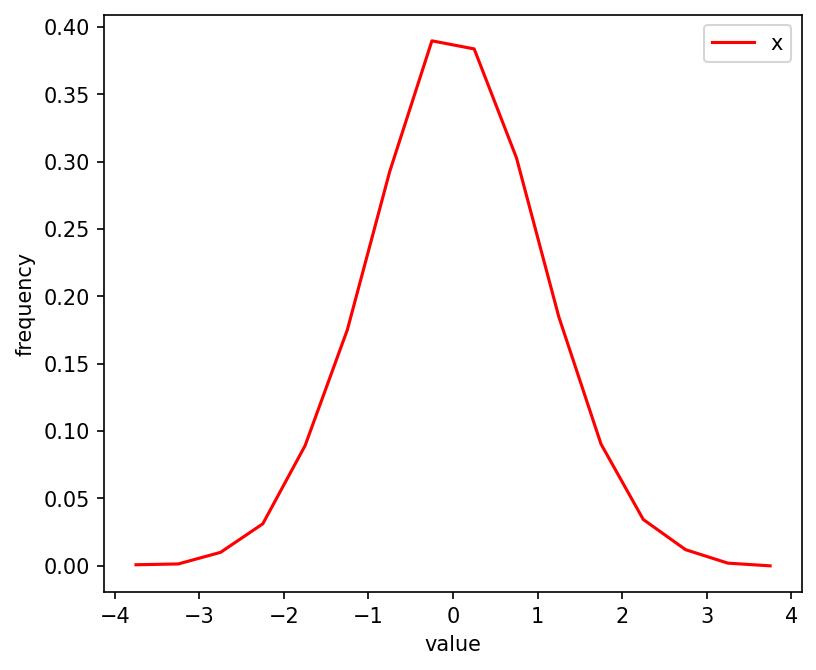

In [33]:
x = np.random.normal(0, 1, size=(10000,))

binwidth = 0.5
x_bins = np.arange(-4, 4.5, binwidth)
hx = np.histogram(x, x_bins)

plt.figure()

x_vals = hx[1][:-1]
fvalsx = hx[0].astype(float) / (np.size(x) * binwidth)
plt.plot(x_vals + binwidth / 2, fvalsx, color='red', label='x')
plt.xlabel('value')
plt.ylabel('frequency')
plt.legend()
plt.show()

We are now ready to describe the moments of this distribution!

### The first moment
The first moment of the distribution is the **mean**. It denotes the central 
value of the distribution relative to its extremes. 

In terms of the probability distribution function f(x) of a random variable, the 
first moment is written:  
$$ \mu_1^{'} = \int_{-\infty}^{\infty} = x f(x) dx $$
This is a very abstract description!

In practical terms, the mean for a random variable X can be calculated as:
$$ \bar{X} = \frac{1}{n} \sum_{i=1}^{n} x_i = \frac{x_1 + x_2 + x_3 + ... + x_n}{n} $$

We can compute this by hand--and you probably have done this in middle school 
or high school! Now, we can automate the application of these kinds of 
mathematical ideas using code. The `numpy` package contains functions to 
calculate many common statistical quantities.

In [34]:
x_mean = np.mean(x)
print(x_mean)

0.01329112405244358


We can plot this on the figure. You can see that the mean lies at the center of the distribution: half of the probability (area under the curve) lies above the mean, and half lies below the mean!

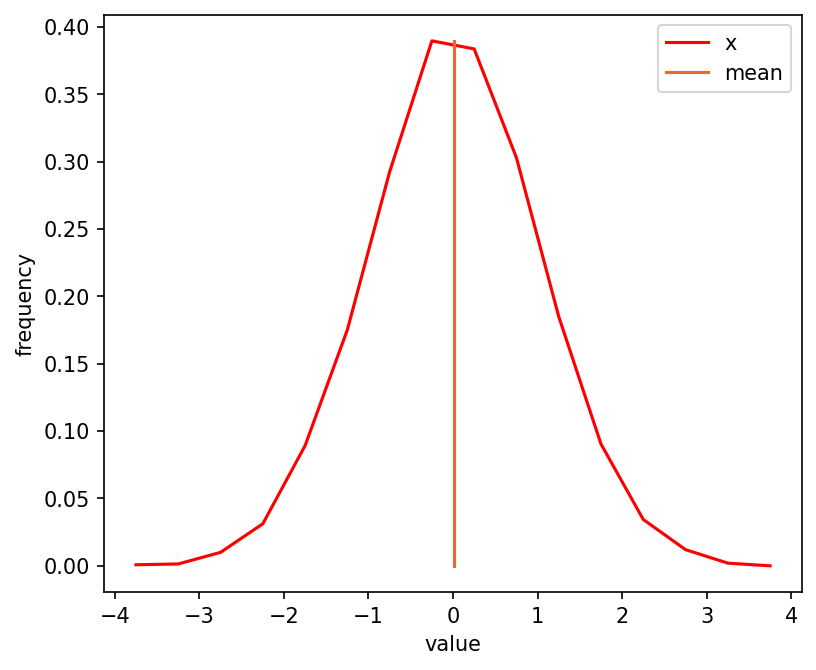

In [35]:
fig = plt.figure()

x_vals = hx[1][:-1]
fvalsx = hx[0].astype(float) / (np.size(x) * binwidth)
plt.plot(x_vals + binwidth / 2, fvalsx, color='red', label='x')
plt.plot([x_mean, x_mean], [0, np.max(fvalsx)], color='#e46c32', label='mean')
plt.xlabel('value')
plt.ylabel('frequency')
plt.legend()
plt.show()

### The second moment
The second moment of the distribution is the **variance**. It measures how much
range the distribution has relative to its mean.

In [36]:
x_variance = np.var(x)
print(x_variance)

0.9983752528358344


As stated above, the variance represents the average deviation from the mean.
One way to visualize this is by shading the region around the mean 
corresponding to the variance in the positive and negative direction.

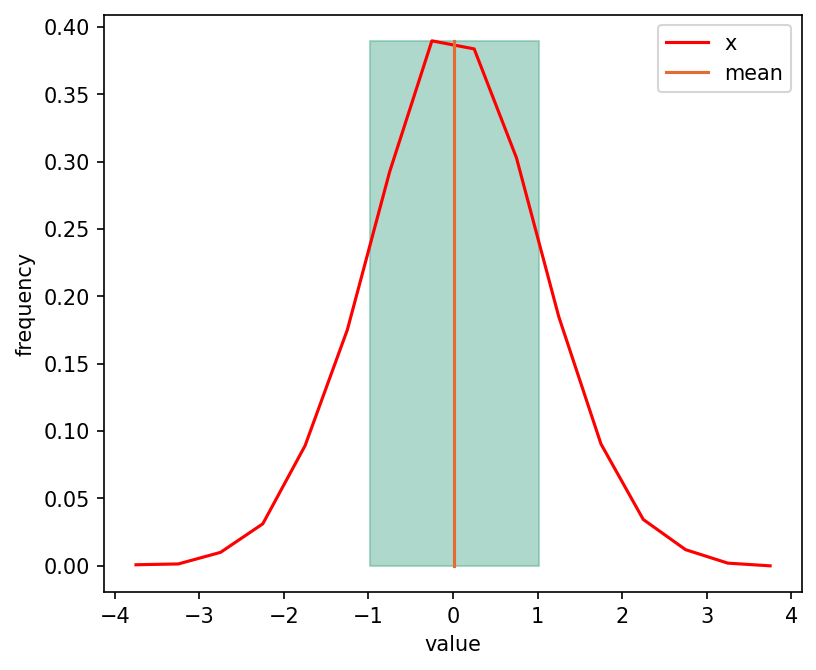

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

x_vals = hx[1][:-1]
fvalsx = hx[0].astype(float) / (np.size(x) * binwidth)
plt.plot(x_vals + binwidth / 2, fvalsx, color='red', label='x')
plt.plot([x_mean, x_mean], [0, np.max(fvalsx)], color='#e46c32', label='mean')
ax.fill_between([x_mean - x_variance, x_mean + x_variance], [np.max(fvalsx), np.max(fvalsx)], edgecolor=None, color='#5eb298', alpha=0.5)
plt.xlabel('value')
plt.ylabel('frequency')
plt.legend()
plt.show()

### The third moment
The third moment of the distribution is the **skewness**. It measures how 
skewed the dissertation is relative to the center; this is often described as
the "lopsidedness" of the distribution.

In [38]:
x_skewness = stats.skew(x)
print(x_skewness)

-0.013065594592863893


A distribution with a skewness of zero is perfectly evenly distributed around 
the mean. The values we draw from the normal distribution by default are close 
to a skewness of zero, though not perfectly equal to this value. The figure 
below displays the distribution of the data, the mean, and has the skewness of 
in the title.

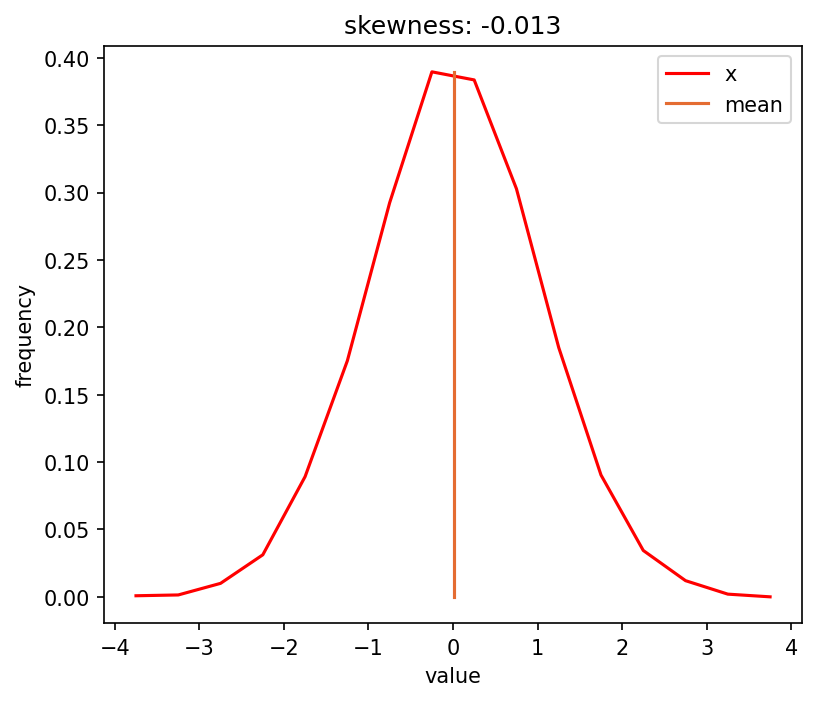

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

x_vals = hx[1][:-1]
fvalsx = hx[0].astype(float) / (np.size(x) * binwidth)
plt.plot(x_vals + binwidth / 2, fvalsx, color='red', label='x')
plt.plot([x_mean, x_mean], [0, np.max(fvalsx)], color='#e46c32', label='mean')
plt.xlabel('value')
plt.ylabel('frequency')
plt.legend()
plt.title('skewness: ' + str(np.round(x_skewness, 3)))
plt.show()

### The fourth moment
The fourth moment of the distribution is the **kurtosis**. Kurtosis describes 
the area under the curve inside the "tails" of the distribution.

In [42]:
x_kurtosis = stats.kurtosis(x)
print(x_kurtosis)

-0.026716262592505036


A distribution with a kurtosis of zero has no tails. As with skewness, the 
values we draw from the normal distribution by default have close to zero 
kurtosis. The figure below displays the distribution of the 
data with the kurtosis in the title.

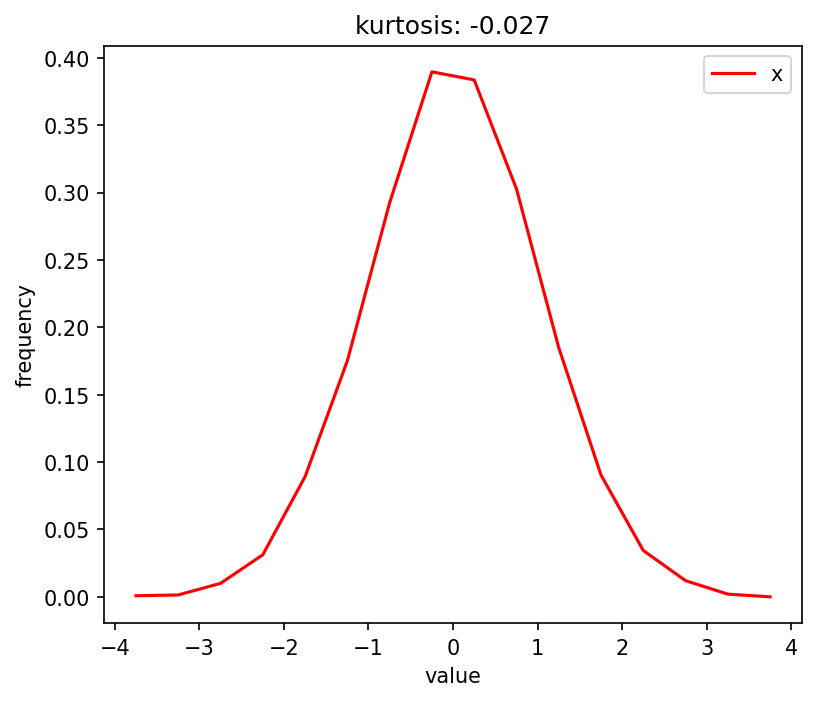

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)

x_vals = hx[1][:-1]
fvalsx = hx[0].astype(float) / (np.size(x) * binwidth)
plt.plot(x_vals + binwidth / 2, fvalsx, color='red', label='x')
plt.xlabel('value')
plt.ylabel('frequency')
plt.legend()
plt.title('kurtosis: ' + str(np.round(x_kurtosis, 3)))
plt.show()

 #### A warning about kurtosis!
Many resources online describe kurtosis as the "peakedness" of the 
distribution. This misinterpretation dates back to the 19th century and is not
correct. Peakedness and kurtosis are unrelated properties. Kurtosis describes 
the tails of the distribution, not the peak(s).

The exact reasons for this misconception go beyond the scope of this course. If
you'd like to learn more, please come to my office hours or read:

* Westfall 2014 "Kurtosis as Peakedness, 1905-2014. R.I.P." *The American 
Statistician* [doi.org/10.1080/00031305.2014.917055](doi.org/10.1080/00031305.2014.917055)

### Why do we call these the first/second/third/fourth moment of the distribution?

The naming of these quantities comes from their mathematical definition. Each 
moment is defined as the *n*-th power of a quantity derived from the 
probability distribution function.

#### Mean: The First Moment


#### Variance: The Second Moment

#### Skewness: The Third Moment

#### Kurtosis: The Fourth Moment

#### Moment Generating Equation

We can use these formulae to calculate the moments by hand. (You may have done 
this for the mean in a middle-school arithmetic course!) Hopefully, it's clear
how automating this through code simplifies this for large datasets and higher
moments.

One can continue to define moments for powers beyond kurtosis. Even-numbered 
powers continue to represent variance while odd powers represent skewness, and 
the quantities become more and more sensitive to extreme values. However, these 
higher-order moments have few practical applications.

There are other key descriptive statistics that do not correspond to moments. 
The standard deviation, median, and mode are three which are particularly 
commonly encountered and will be explored in another notebook.